<a href="https://colab.research.google.com/github/pragatisachan/ProjectChalenge1/blob/main/club_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from datetime import datetime

## Load data

In [7]:
df = pd.read_csv('/content/Merged_Data.csv')
df

,BadgeID,DOJ_x,Suburb_x,Tier_x,Gender_x,Productgroup,Gyear,Gmonth,TGV,First Name,...,Email,OfferType,Redeem Date,Pre 4 Weeks Spent,Same Day Spent,Post 4 Weeks Spent,Pre 4 Weeks Visits,Post 4 Weeks Visits,4 Weeks Pre Avg Spent per Visits,4 Weeks Post Avg Spent per Visits
0,11439,7/13/2024,Bonnyrigg,Base,Female,Beverage,2024,11,9.60,Everest,...,evermunzondo@yahoo.com.au,5000 Bonus Point,2024-08-10,1142.86,336.44,303.25,3.0,1.0,1142.86,303.25
1,20950,11/20/2024,Koonawarra,Base,Female,Gaming,2025,2,334.02,Rosalie,...,-,5000 Bonus Point,2024-12-19,1811.93,471.84,NaN,3.0,NaN,1811.93,NaN
2,14564,8/30/2024,Stream Hill,Base,Male,Gaming,2025,3,5482.64,John,...,-,5000 Bonus Point,2024-10-29,4390.63,129.74,4313.65,18.0,17.0,4390.63,4313.65
3,23207,12/15/2024,Brownsville,Base,Female,Gaming,2025,2,112.71,Candy,...,-,5000 Bonus Point,2025-01-17,52.85,39.18,125.97,1.0,4.0,52.85,125.97
4,19252,10/30/2024,Albion Park Rail,Base,Male,Gaming,2025,3,286.79,Justin,...,-,5000 Bonus Point,2024-11-14,349.48,199.58,398.47,2.0,3.0,349.48,398.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,19129,10/27/2024,Kanahooka,Base,Male,Sundry,2025,4,0.00,Steven,...,stevedy82@gmail.com,5000 Bonus Point,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
1113,33645,05-10-2025,Albion Park,Platinum,Female,Gaming,2025,6,2513.09,Emma,...,emmajanekearns86@hotmail.com,5000 Bonus Point,2025-06-21,2146.04,27.10,NaN,2.0,NaN,2146.04,NaN
1114,11981,7/31/2024,Plumpton,Base,Female,Beverage,2025,1,438.50,Yupin,...,yupinch2831@gmail.com,5000 Bonus Point,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN
1115,26041,1/29/2025,Kanahooka,Base,Female,Gaming,2025,1,179.96,Melissa,...,-,5000 Bonus Point,2025-02-24,184.76,0.00,NaN,1.0,NaN,184.76,NaN


# **# Calculate Age from DOB if needed**

In [9]:
if 'DOB' in df.columns:
    df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
    df['Age'] = 2025 - df['DOB'].dt.year
    df['Age'] = df['Age'].fillna(df['Age'].median())
elif 'Age' not in df.columns:
    raise ValueError("No 'DOB' or 'Age' column found in the data.")


# **Target**: **OfferAccepted**

In [10]:
df['OfferAccepted'] = df['Redeem Date'].notnull().astype(int)

# **Numeric columns: fill missing with** **0**

In [11]:
num_cols = [
    'Pre 4 Weeks Spent', 'Same Day Spent', 'Post 4 Weeks Spent',
    'Pre 4 Weeks Visits', 'Post 4 Weeks Visits',
    '4 Weeks Pre Avg Spent per Visits', '4 Weeks Post Avg Spent per Visits'
]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


# **Encode categorical variables**

In [12]:
from sklearn.preprocessing import LabelEncoder
le_tier = LabelEncoder()
le_gender = LabelEncoder()
le_prod = LabelEncoder()

df['Tier'] = le_tier.fit_transform(df['Tier_x'].astype(str))
df['Gender'] = le_gender.fit_transform(df['Gender_x'].astype(str))
df['Productgroup'] = le_prod.fit_transform(df['Productgroup'].astype(str))

## **Clustering (KMeans)**

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Features for clustering (including Age)
cluster_features = [
    'Tier', 'Gender', 'Productgroup', 'Age',
    'Pre 4 Weeks Spent', 'Pre 4 Weeks Visits', '4 Weeks Pre Avg Spent per Visits'
]
X_cluster = df[cluster_features]

# Standardize features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans clustering (choose 3 )
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [29]:
# Select features
from sklearn.model_selection import train_test_split
features = ['Tier', 'Gender', 'Productgroup', 'Age', 'Pre 4 Weeks Spent', 'Pre 4 Weeks Visits', '4 Weeks Pre Avg Spent per Visits']
X = df[features]
y = df['OfferAccepted']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# **Train the Model**

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **Test the Model and Evaluate Accuracy**

Accuracy: 0.9880952380952381
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       237
           1       0.99      0.97      0.98        99

    accuracy                           0.99       336
   macro avg       0.99      0.98      0.99       336
weighted avg       0.99      0.99      0.99       336



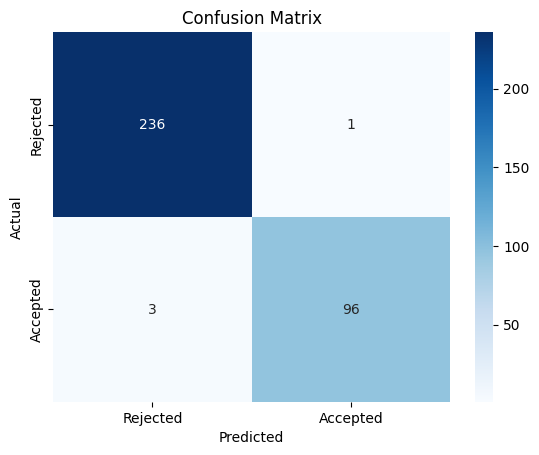

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rejected', 'Accepted'], yticklabels=['Rejected', 'Accepted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Test on Sample Data**

In [32]:

sample = X_test.sample(5, random_state=1)
sample_pred = clf.predict(sample)
print("Sample predictions (0=Rejected, 1=Accepted):", sample_pred)
print("Sample actual:", y_test.loc[sample.index].values)


Sample predictions (0=Rejected, 1=Accepted): [0 0 0 0 0]
Sample actual: [0 0 0 0 0]


# **Visualization: Offer Acceptance vs. Age**

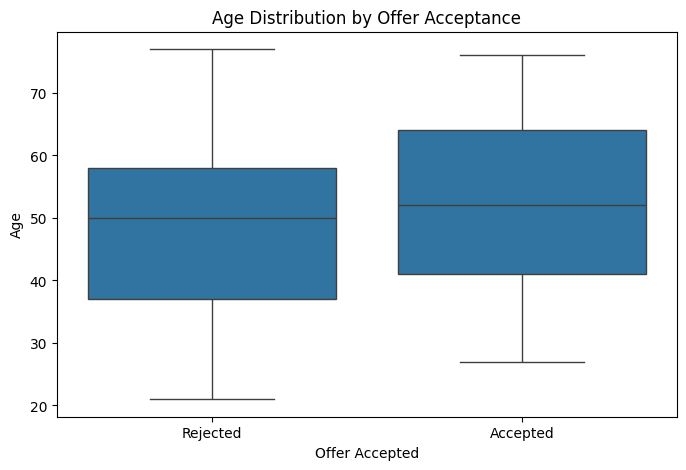

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x='OfferAccepted', y='Age', data=df)
plt.title('Age Distribution by Offer Acceptance')
plt.xlabel('Offer Accepted')
plt.ylabel('Age')
plt.xticks([0,1], ['Rejected', 'Accepted'])
plt.show()


# **Visualization: Offer Acceptance Rate by Cluster**

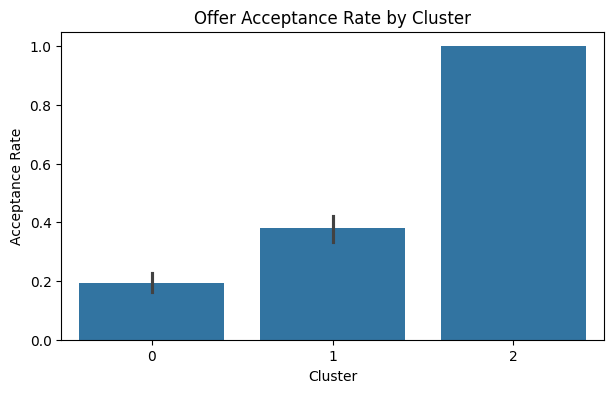

In [17]:
plt.figure(figsize=(7,4))
sns.barplot(x='Cluster', y='OfferAccepted', data=df, estimator=np.mean)
plt.title('Offer Acceptance Rate by Cluster')
plt.ylabel('Acceptance Rate')
plt.xlabel('Cluster')
plt.show()


# **Visualization: Cluster Profiles**


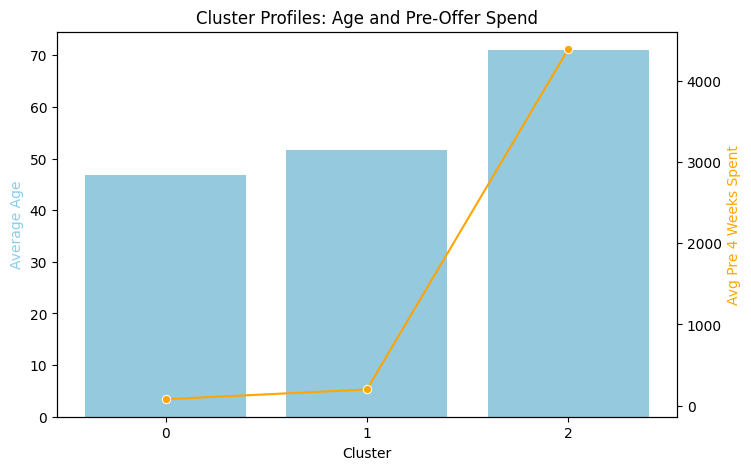

In [18]:
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Pre 4 Weeks Spent': 'mean',
    'OfferAccepted': 'mean'
}).reset_index()

# Plot average age and spend per cluster
fig, ax1 = plt.subplots(figsize=(8,5))
sns.barplot(x='Cluster', y='Age', data=cluster_summary, ax=ax1, color='skyblue')
ax1.set_ylabel('Average Age', color='skyblue')
ax2 = ax1.twinx()
sns.lineplot(x='Cluster', y='Pre 4 Weeks Spent', data=cluster_summary, ax=ax2, color='orange', marker='o')
ax2.set_ylabel('Avg Pre 4 Weeks Spent', color='orange')
plt.title('Cluster Profiles: Age and Pre-Offer Spend')
plt.show()


# **Visualization: Offer Acceptance vs. Age (Scatter)**

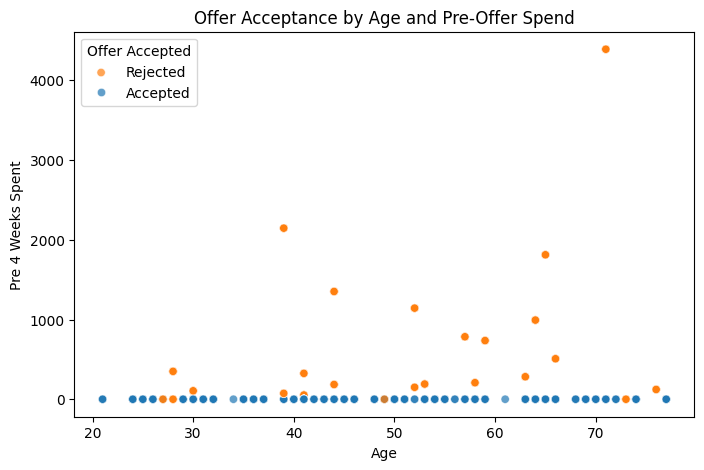

In [19]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Age', y='Pre 4 Weeks Spent', hue='OfferAccepted', data=df, alpha=0.7)
plt.title('Offer Acceptance by Age and Pre-Offer Spend')
plt.xlabel('Age')
plt.ylabel('Pre 4 Weeks Spent')
plt.legend(title='Offer Accepted', labels=['Rejected', 'Accepted'])
plt.show()


# **Heatmap: Acceptance Rate by Product Group and Gender**

/tmp/ipython-input-21-2027151046.py:1: FutureWarning: The provided callable <function mean at 0x7cd0e03da3e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot = pd.pivot_table(df, values='OfferAccepted', index='Productgroup', columns='Gender_x', aggfunc=np.mean)


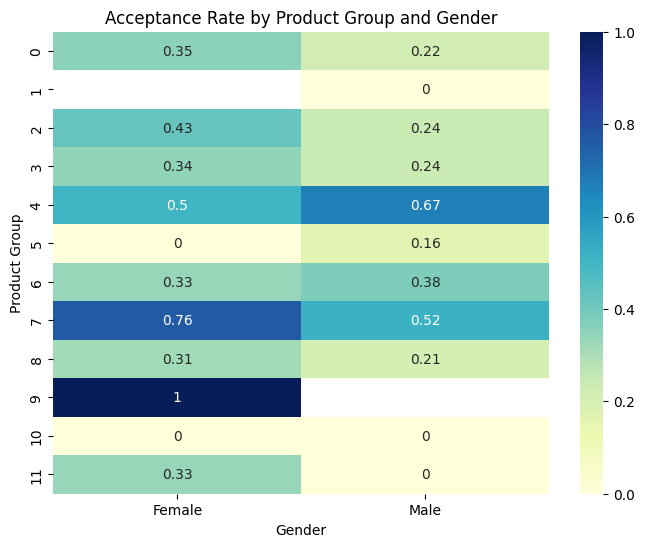

In [21]:
pivot = pd.pivot_table(df, values='OfferAccepted', index='Productgroup', columns='Gender_x', aggfunc=np.mean)
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Acceptance Rate by Product Group and Gender')
plt.ylabel('Product Group')
plt.xlabel('Gender')
plt.show()


Cluster **Visualization**

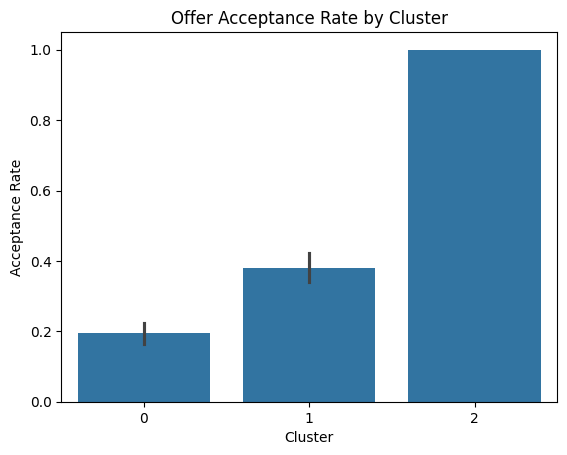

In [23]:
# Assuming you have a 'Cluster' column from KMeans
sns.barplot(x='Cluster', y='OfferAccepted', data=df, estimator=np.mean)
plt.title('Offer Acceptance Rate by Cluster')
plt.ylabel('Acceptance Rate')
plt.xlabel('Cluster')
plt.show()


What do clusters 0, 1, 2 represent?

Cluster numbers are arbitrary. For example, cluster 0 could be mostly young, high-spending members, or it could be older, low-spending members—it depends on your data and how the algorithm grouped them.

You must interpret the clusters by examining their characteristics. This is usually done by looking at the average values of key features (like Age, Productgroup, Spend, OfferAccepted) within each cluster.

# **Profile Each Cluster**

In [24]:
# Assuming df['Cluster'] contains your cluster labels
cluster_profile = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Pre 4 Weeks Spent': 'mean',
    'OfferAccepted': 'mean',
    'Productgroup': lambda x: x.value_counts().index[0],  # Most common product group
    'Tier': lambda x: x.value_counts().index[0],          # Most common tier
    # Add more features if you want
}).reset_index()

print(cluster_profile)


   Cluster        Age  Pre 4 Weeks Spent  OfferAccepted  Productgroup  Tier
0        0  46.811594          79.070596       0.194847             3     0
1        1  51.701944         199.252808       0.380130             3     0
2        2  71.000000        4390.630000       1.000000             3     0


Cluster 0: Younger, high spenders, mostly gaming, high acceptance rate.

Cluster 1: Older, low spenders, mostly sundry, low acceptance rate.

Cluster 2: Middle-aged, moderate spenders, mostly beverage, moderate acceptance

# **Visualize Cluster Acceptance Rate**

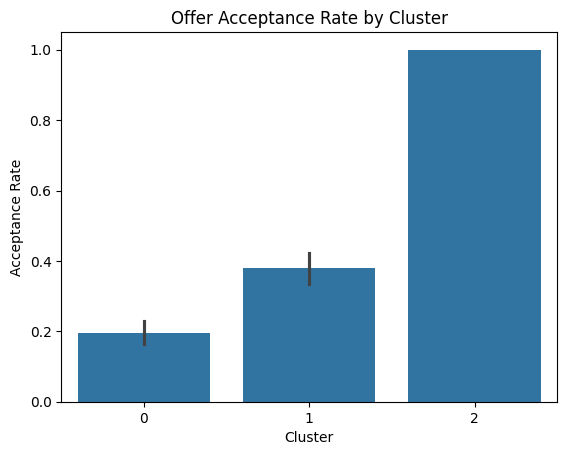

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Cluster', y='OfferAccepted', data=df, estimator=np.mean)
plt.title('Offer Acceptance Rate by Cluster')
plt.ylabel('Acceptance Rate')
plt.xlabel('Cluster')
plt.show()


Summary
Cluster 0, 1, 2 are just group labels.

Their meaning comes from the characteristics of the members in each group (age, spend, tier, productgroup, acceptance rate, etc.).

You must profile each cluster to understand what kind of members it contains.